In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

import warnings
warnings.filterwarnings("ignore")

In [2]:
classifier = Sequential()

classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation= 'relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(32, 3, 3, activation= 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(units= 128, activation= 'relu'))
classifier.add(Dense(units= 3, activation= 'softmax'))

In [4]:
classifier.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [5]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range= 0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale= 1./255)

training_set = train_datagen.flow_from_directory(r"C:\Users\sunny1\Desktop\Cp2\flower\dataset\Train",
                                                target_size= (64, 64),
                                                batch_size= 32,
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory(r"C:\Users\sunny1\Desktop\Cp2\flower\dataset\Test",
                                           target_size= (64, 64),
                                           batch_size=32,
                                           class_mode='categorical')

Found 180 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [10]:
classifier.fit_generator(training_set,
                        steps_per_epoch=len(training_set),
                        epochs=30,
                        validation_data=test_set,
                        validation_steps=len(test_set))

Epoch 1/30
6/6 [==============================] - 19s 2s/step - loss: 1.0944 - accuracy: 0.3333 - val_loss: 1.0794 - val_accuracy: 0.4889
Epoch 2/30
6/6 [==============================] - 5s 849ms/step - loss: 1.0744 - accuracy: 0.5278 - val_loss: 1.0598 - val_accuracy: 0.5722
Epoch 3/30
6/6 [==============================] - 5s 910ms/step - loss: 1.0484 - accuracy: 0.6000 - val_loss: 1.0238 - val_accuracy: 0.6000
Epoch 4/30
6/6 [==============================] - 5s 871ms/step - loss: 1.0147 - accuracy: 0.5222 - val_loss: 0.9721 - val_accuracy: 0.5500
Epoch 5/30
6/6 [==============================] - 5s 864ms/step - loss: 0.9622 - accuracy: 0.5722 - val_loss: 0.9089 - val_accuracy: 0.6056
Epoch 6/30
6/6 [==============================] - 5s 857ms/step - loss: 0.8990 - accuracy: 0.6167 - val_loss: 0.8488 - val_accuracy: 0.6278
Epoch 7/30
6/6 [==============================] - 5s 862ms/step - loss: 0.8477 - accuracy: 0.5889 - val_loss: 0.8168 - val_accuracy: 0.5944
Epoch 8/30
6/6 [======

In [11]:
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt 

In [12]:
classifier.save('flower_classifier.h5')

In [13]:
model = load_model("flower_classifier.h5")

def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255
    Probability = model.predict(raw_img)[0][0]
    plt.imshow(cv2.imread(path))
    print('Probability : ',Probability)
    if Probability > 0.5:
        print("its a Rose")
    elif Probability > 0.25:
        print("its a Tulip")
    else:
        print("its a Sunflower")


In [14]:
def model_output(path):
    raw_img = image.load_img(path, target_size=(64, 64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255.0  # Normalizing the image data
    probabilities = model.predict(raw_img)[0]
    plt.imshow(cv2.imread(path))
    print('Probabilities:', probabilities)

    flower = ['Rose', 'Sunflower', 'Tulip']

    max_prob_index = np.argmax(probabilities)
    max_prob = probabilities[max_prob_index]

    if max_prob > 0.5:
        print(f"It's {flower[max_prob_index]}")
    else:
        print("Flower not confidently detected")

In [ ]:
import os
os.chdir(r"C:\Users\Shriya\Desktop\cap2\Dataset")

1/1 [==============================] - 0s 453ms/step
Probabilities: [0.5411609  0.02761419 0.43122503]
It's Rose


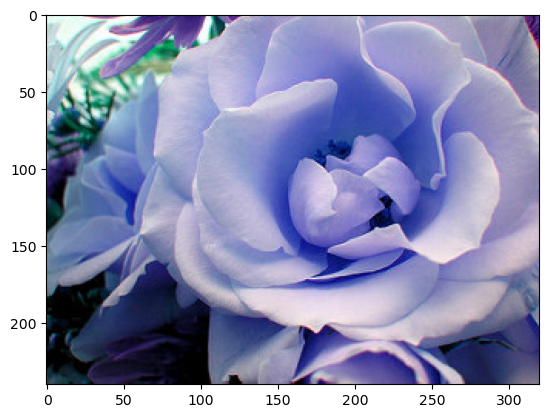

In [15]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\flower\dataset\Train\rose\12240303_80d87f77a3_n.jpg")

1/1 [==============================] - 0s 62ms/step
Probabilities: [0.6439448  0.06043138 0.2956239 ]
It's Rose


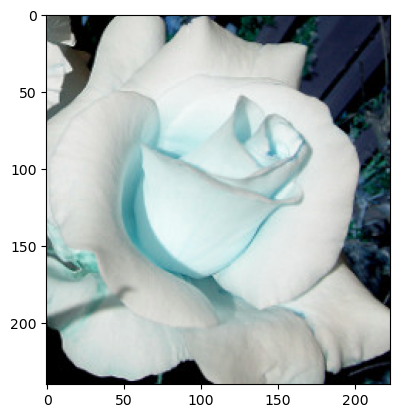

In [16]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\flower\dataset\Train\rose\921984328_a60076f070_m.jpg")

1/1 [==============================] - 0s 63ms/step
Probabilities: [0.7621824  0.00138294 0.23643458]
It's Rose


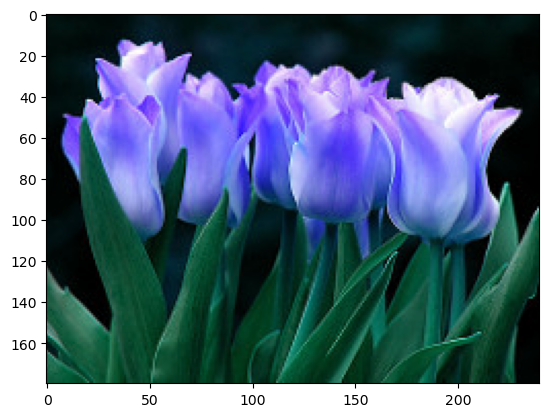

In [19]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\flower\dataset\Train\tulip\112651128_7b5d39a346_m.jpg")

1/1 [==============================] - 0s 78ms/step
Probabilities: [0.00615347 0.98742723 0.00641933]
It's Sunflower


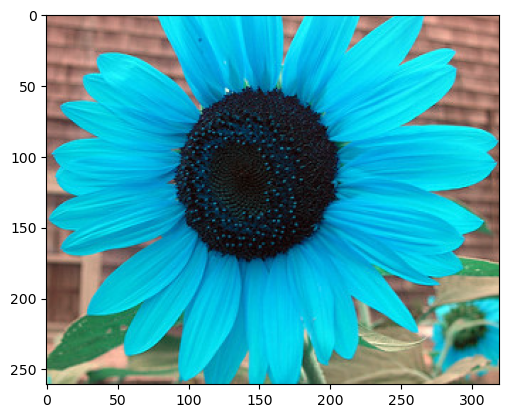

In [20]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\flower\dataset\Train\sunflower\44079668_34dfee3da1_n.jpg")

1/1 [==============================] - 0s 78ms/step
Probabilities: [0.00600326 0.98743945 0.00655731]
It's Sunflower


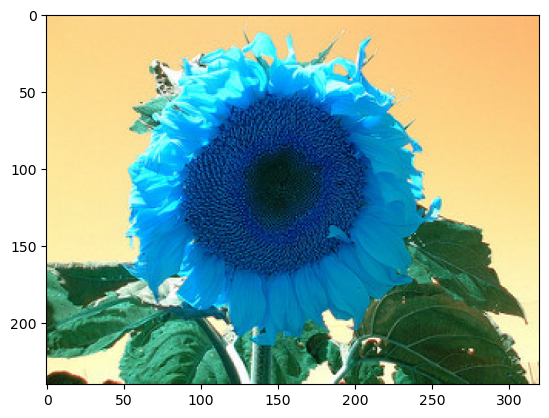

In [21]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\flower\dataset\Train\sunflower\145303599_2627e23815_n.jpg")

## Import Model

In [22]:
import pickle
pickle.dump(model, open(r"C:\Users\sunny1\Desktop\Cp2\flower\flower_classifier.pkl",'wb'))   # Exporting model from python to laptop